In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0edc367e336e8e6f684fe6f8bfbfc05e


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | cherskiy
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | conde
Processing Record 5 of Set 1 | copiapo
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | kapit
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | cairns
Processing Record 10 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 11 of Set 1 | izumo
Processing Record 12 of Set 1 | yar-sale
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | hasaki
Processing Record 16 of Set 1 | cockburn town
Processing Record 17 of Set 1 | xinzhi
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | dikson
Processing Record 23 of Set 1 | bethel
Processi

Processing Record 41 of Set 4 | luderitz
Processing Record 42 of Set 4 | nome
Processing Record 43 of Set 4 | saldanha
Processing Record 44 of Set 4 | juneau
Processing Record 45 of Set 4 | vila velha
Processing Record 46 of Set 4 | menomonie
Processing Record 47 of Set 4 | burnie
Processing Record 48 of Set 4 | los llanos de aridane
Processing Record 49 of Set 4 | bodden town
Processing Record 50 of Set 4 | dalbandin
Processing Record 1 of Set 5 | chuy
Processing Record 2 of Set 5 | arman
Processing Record 3 of Set 5 | bintulu
Processing Record 4 of Set 5 | hovd
Processing Record 5 of Set 5 | bur gabo
City not found. Skipping...
Processing Record 6 of Set 5 | takoradi
Processing Record 7 of Set 5 | ternate
Processing Record 8 of Set 5 | tura
Processing Record 9 of Set 5 | kuche
City not found. Skipping...
Processing Record 10 of Set 5 | pevek
Processing Record 11 of Set 5 | tateyama
Processing Record 12 of Set 5 | gweta
Processing Record 13 of Set 5 | tasiilaq
Processing Record 14 of 

Processing Record 29 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 30 of Set 8 | taft
Processing Record 31 of Set 8 | baruun-urt
Processing Record 32 of Set 8 | palmer
Processing Record 33 of Set 8 | college
Processing Record 34 of Set 8 | banda aceh
Processing Record 35 of Set 8 | price
Processing Record 36 of Set 8 | kloulklubed
Processing Record 37 of Set 8 | tongliao
Processing Record 38 of Set 8 | koyelga
Processing Record 39 of Set 8 | sabha
Processing Record 40 of Set 8 | marfino
Processing Record 41 of Set 8 | cayenne
Processing Record 42 of Set 8 | horsham
Processing Record 43 of Set 8 | viedma
Processing Record 44 of Set 8 | fare
Processing Record 45 of Set 8 | konskie
Processing Record 46 of Set 8 | soyo
Processing Record 47 of Set 8 | paradwip
City not found. Skipping...
Processing Record 48 of Set 8 | raudeberg
Processing Record 49 of Set 8 | nicoya
Processing Record 50 of Set 8 | ayia galini
Processing Record 1 of Set 9 | alkhan-churt
Processing Reco

Processing Record 14 of Set 12 | comodoro rivadavia
Processing Record 15 of Set 12 | zamora
Processing Record 16 of Set 12 | tanga
Processing Record 17 of Set 12 | nagato
Processing Record 18 of Set 12 | lazaro cardenas
Processing Record 19 of Set 12 | monterey
Processing Record 20 of Set 12 | tobol
Processing Record 21 of Set 12 | middlesbrough
Processing Record 22 of Set 12 | doka
Processing Record 23 of Set 12 | oksfjord
Processing Record 24 of Set 12 | labuhan
Processing Record 25 of Set 12 | gizo
Processing Record 26 of Set 12 | inhambane
Processing Record 27 of Set 12 | puerto escondido
Processing Record 28 of Set 12 | ajdabiya
Processing Record 29 of Set 12 | sinnamary
Processing Record 30 of Set 12 | seydi
Processing Record 31 of Set 12 | komsomolskiy
Processing Record 32 of Set 12 | bardstown
Processing Record 33 of Set 12 | goalpara
Processing Record 34 of Set 12 | vila nova de milfontes
Processing Record 35 of Set 12 | opuwo
Processing Record 36 of Set 12 | marsa matruh
Proc

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cherskiy,68.7500,161.3000,6.76,95,67,1.66,RU,2021-10-09 04:52:48
1,New Norfolk,-42.7826,147.0587,62.10,52,94,4.00,AU,2021-10-09 04:52:48
2,Nikolskoye,59.7035,30.7861,51.87,74,100,6.96,RU,2021-10-09 04:52:49
3,Conde,-7.2597,-34.9075,74.66,94,20,4.61,BR,2021-10-09 04:52:49
4,Copiapo,-27.3667,-70.3333,47.89,68,0,2.30,CL,2021-10-09 04:52:49
5,Puerto Ayora,-0.7393,-90.3518,67.55,98,100,4.00,EC,2021-10-09 04:52:50
6,Kapit,2.0167,112.9333,96.24,44,32,2.39,MY,2021-10-09 04:52:50
7,Albany,42.6001,-73.9662,60.76,82,98,6.96,US,2021-10-09 04:49:14
8,Cairns,-16.9167,145.7667,91.06,53,40,12.66,AU,2021-10-09 04:51:41
9,Izumo,35.3667,132.7667,80.49,69,40,18.41,JP,2021-10-09 04:52:51


In [12]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cherskiy,RU,2021-10-09 04:52:48,68.7500,161.3000,6.76,95,67,1.66
1,New Norfolk,AU,2021-10-09 04:52:48,-42.7826,147.0587,62.10,52,94,4.00
2,Nikolskoye,RU,2021-10-09 04:52:49,59.7035,30.7861,51.87,74,100,6.96
3,Conde,BR,2021-10-09 04:52:49,-7.2597,-34.9075,74.66,94,20,4.61
4,Copiapo,CL,2021-10-09 04:52:49,-27.3667,-70.3333,47.89,68,0,2.30
...,...,...,...,...,...,...,...,...,...
543,Mangrol,IN,2021-10-09 04:56:13,21.1167,70.1167,85.50,70,84,5.19
544,Aquiraz,BR,2021-10-09 04:56:13,-3.9014,-38.3911,84.22,69,96,13.18
545,Biak,ID,2021-10-09 04:56:13,-0.9131,122.8766,84.00,65,21,6.96
546,Tebingtinggi,ID,2021-10-09 04:56:14,3.3285,99.1625,87.85,54,80,3.56


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

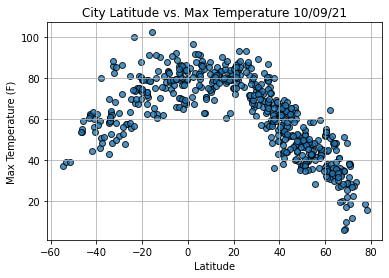

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

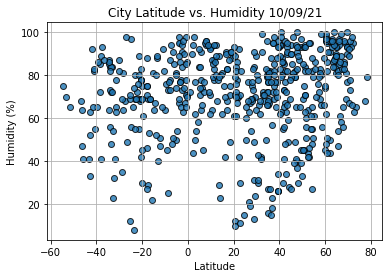

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

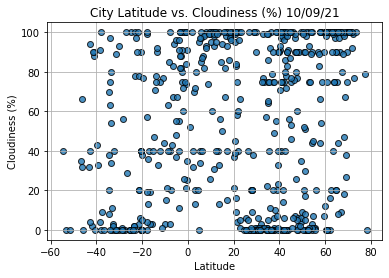

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

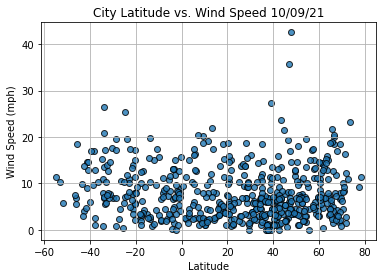

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                       Hasaki
Country                        JP
Date          2021-10-09 04:52:52
Lat                       35.7333
Lng                      140.8333
Max Temp                     75.6
Humidity                       82
Cloudiness                     92
Wind Speed                  14.94
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cherskiy,RU,2021-10-09 04:52:48,68.7500,161.3000,6.76,95,67,1.66
2,Nikolskoye,RU,2021-10-09 04:52:49,59.7035,30.7861,51.87,74,100,6.96
6,Kapit,MY,2021-10-09 04:52:50,2.0167,112.9333,96.24,44,32,2.39
7,Albany,US,2021-10-09 04:49:14,42.6001,-73.9662,60.76,82,98,6.96
9,Izumo,JP,2021-10-09 04:52:51,35.3667,132.7667,80.49,69,40,18.41
...,...,...,...,...,...,...,...,...,...
537,Maniitsoq,GL,2021-10-09 04:56:10,65.4167,-52.9000,32.07,47,8,6.55
541,Narodychi,UA,2021-10-09 04:56:12,51.2029,29.0823,34.66,71,17,6.73
542,Hobyo,SO,2021-10-09 04:56:12,5.3505,48.5268,80.83,74,34,17.49
543,Mangrol,IN,2021-10-09 04:56:13,21.1167,70.1167,85.50,70,84,5.19


In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cherskiy,RU,2021-10-09 04:52:48,68.7500,161.3000,6.76,95,67,1.66
2,Nikolskoye,RU,2021-10-09 04:52:49,59.7035,30.7861,51.87,74,100,6.96
6,Kapit,MY,2021-10-09 04:52:50,2.0167,112.9333,96.24,44,32,2.39
7,Albany,US,2021-10-09 04:49:14,42.6001,-73.9662,60.76,82,98,6.96
9,Izumo,JP,2021-10-09 04:52:51,35.3667,132.7667,80.49,69,40,18.41


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cherskiy,RU,2021-10-09 04:52:48,68.7500,161.3000,6.76,95,67,1.66
2,Nikolskoye,RU,2021-10-09 04:52:49,59.7035,30.7861,51.87,74,100,6.96
6,Kapit,MY,2021-10-09 04:52:50,2.0167,112.9333,96.24,44,32,2.39
7,Albany,US,2021-10-09 04:49:14,42.6001,-73.9662,60.76,82,98,6.96
9,Izumo,JP,2021-10-09 04:52:51,35.3667,132.7667,80.49,69,40,18.41
...,...,...,...,...,...,...,...,...,...
537,Maniitsoq,GL,2021-10-09 04:56:10,65.4167,-52.9000,32.07,47,8,6.55
541,Narodychi,UA,2021-10-09 04:56:12,51.2029,29.0823,34.66,71,17,6.73
542,Hobyo,SO,2021-10-09 04:56:12,5.3505,48.5268,80.83,74,34,17.49
543,Mangrol,IN,2021-10-09 04:56:13,21.1167,70.1167,85.50,70,84,5.19


In [25]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,New Norfolk,AU,2021-10-09 04:52:48,-42.7826,147.0587,62.10,52,94,4.00
3,Conde,BR,2021-10-09 04:52:49,-7.2597,-34.9075,74.66,94,20,4.61
4,Copiapo,CL,2021-10-09 04:52:49,-27.3667,-70.3333,47.89,68,0,2.30
5,Puerto Ayora,EC,2021-10-09 04:52:50,-0.7393,-90.3518,67.55,98,100,4.00
8,Cairns,AU,2021-10-09 04:51:41,-16.9167,145.7667,91.06,53,40,12.66
...,...,...,...,...,...,...,...,...,...
539,Ambon,ID,2021-10-09 04:56:11,-3.6954,128.1814,82.54,89,40,4.61
540,Sirari,TZ,2021-10-09 04:56:12,-1.2333,34.4333,69.06,67,75,7.83
544,Aquiraz,BR,2021-10-09 04:56:13,-3.9014,-38.3911,84.22,69,96,13.18
545,Biak,ID,2021-10-09 04:56:13,-0.9131,122.8766,84.00,65,21,6.96


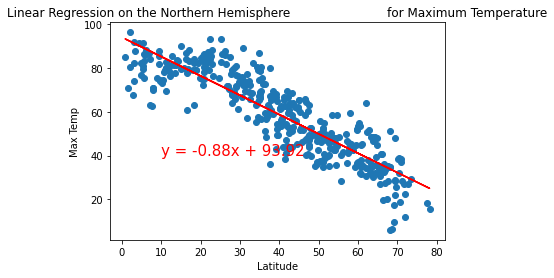

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

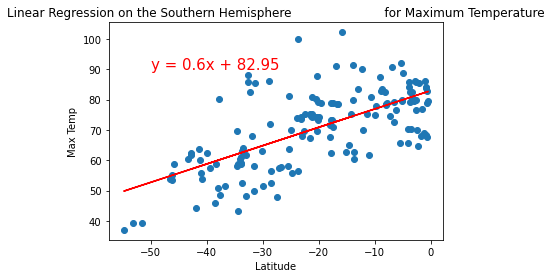

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-50,90))

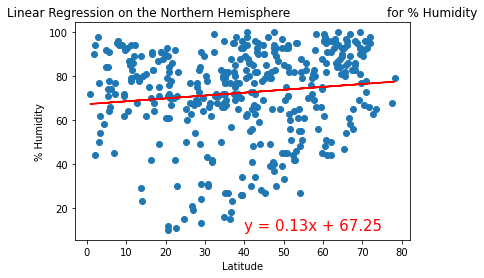

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

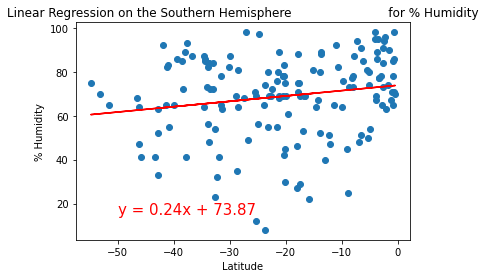

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

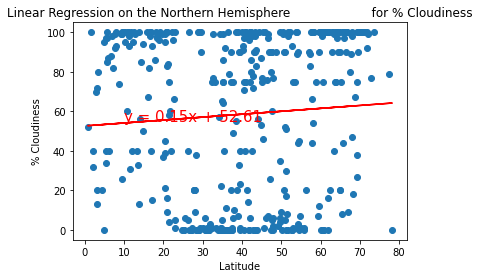

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

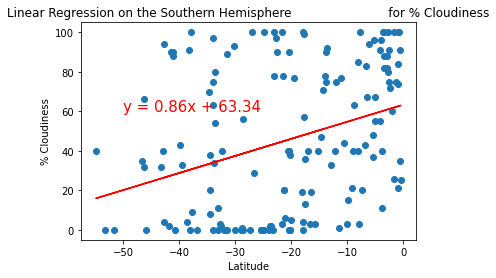

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

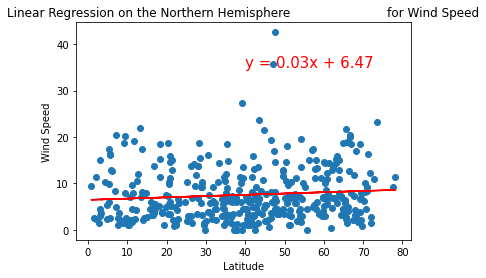

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

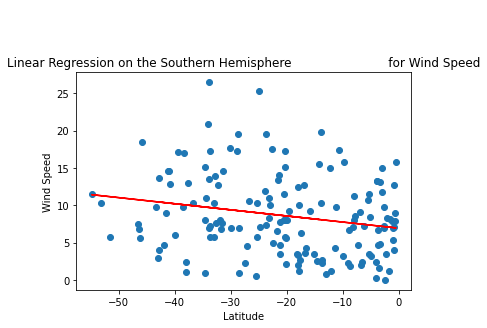

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))